In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
import random

In [256]:
def calculate_far_field(intensities, phases, aperture_positions, aperture_radius, wavelength, distance, x_range, y_range):
    # Создание рабочей области
    x = np.linspace(x_range[0], x_range[1], 150)
    y = np.linspace(y_range[0], y_range[1], 150)
    X, Y = np.meshgrid(x, y)
    dx = x[1] - x[0]
    dy = y[1] - y[0]

    # Поле в ближней зоне
    E_near_field = np.zeros_like(X, dtype=complex)
    for i in range(len(aperture_positions)):
        aperture_pos = aperture_positions[i]
        phase = np.exp(1j * phases[i])
        r = np.sqrt((X - aperture_pos[0])**2 + (Y - aperture_pos[1])**2)
        mask = r <= aperture_radius
        E_near_field += np.where(mask, intensities[i] * np.exp(1j*phase), 0)

    # Поле в дальней зоне при помощи преобразований фурье
    E_far_field = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(E_near_field))) * dx * dy / (wavelength * distance)**2

    # Интенсивность поля в дальней зоне до фазировки
    intensity_before = np.abs(E_far_field)**2
    # Фазировка поля в дальней зоне
    E_phase = E_far_field / np.abs(E_far_field)

    # Интенсивность поля в дальней зоне после фазировки
    intensity_after = np.abs(E_phase)**2
    
    
    # Построение графиков интенсивности
    # График ближней зоны
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    im1 = axes[0].imshow(abs(E_near_field)**2, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='viridis', vmin=0, vmax=1)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y',rotation = 0)
    axes[0].set_xlim(x_range[0]/2,x_range[1]/2)
    axes[0].set_ylim(y_range[0]/2,y_range[1]/2)
    axes[0].set_title('Intensity in near field')
    fig.colorbar(im1, ax=axes[0])
    
    # График дальней зоны
    im1 = axes[1].imshow(intensity_before, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='viridis')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y',rotation = 0)
    axes[1].set_xlim(x_range[0]/4,x_range[1]/4)
    axes[1].set_ylim(y_range[0]/4,y_range[1]/4)
    axes[1].set_title('Intensity before phasing in far field')
    fig.colorbar(im1, ax=axes[1])
    
    
    plt.tight_layout()
    plt.show()

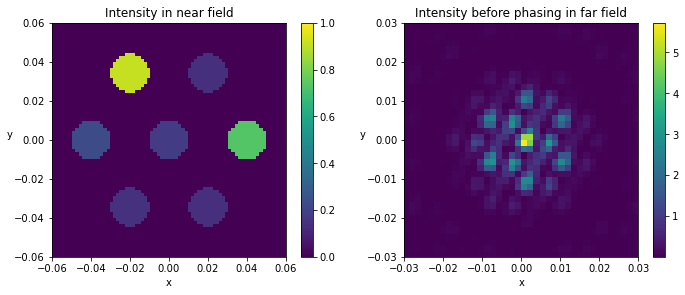

In [257]:
# Параметры моделирования для 7 каналов
intensities = np.ones(7)  # Интенсивности источников

#  Фазы источников
#phases = np.ones(7)*np.pi 
phases = np.random.sample(7)*np.pi
R = 0.04
aperture_positions = [(0, 0), (R, 0), (R/2, -R*np.sqrt(3)/2), 
                      (-R/2, -R*np.sqrt(3)/2),(-R,0),(-1/2*R,R*np.sqrt(3)/2),
                      (R/2,R*np.sqrt(3)/2)]  # Позиции отверстий
aperture_radius = 0.01  # Радиус отверстий
wavelength = 0.5  # Длина волны 
distance = 0.04  # Расстояние от ближней зоны до дальней зоны, она же z
x_range = (-0.12, 0.12)  # Диапазон по x
y_range = (-0.12, 0.12)  # Диапазон по y

# Моделирование поля в ближней и дальней зоне
calculate_far_field(intensities, phases, aperture_positions, aperture_radius, wavelength, distance, x_range, y_range)

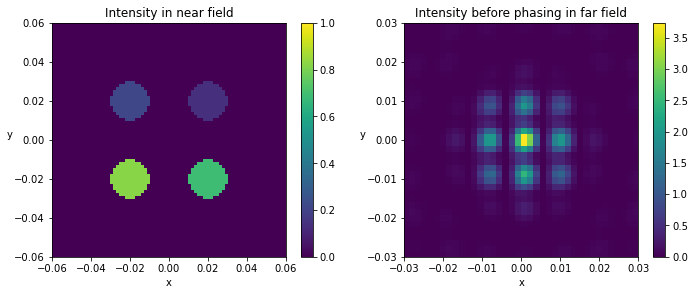

In [259]:
# Параметры моделирования для 4 каналов
intensities = np.ones(4)  # Интенсивности источников

#  Фазы источников
#phases = np.ones(4)*np.pi 
phases = np.random.sample(4)*np.pi
R = 0.04
aperture_positions = aperture_positions = [(-R/2, R/2), (R/2, R/2), (-R/2, -R/2), (R/2, -R/2)]  # Позиции отверстий
aperture_radius = 0.01  # Радиус отверстий
wavelength = 0.5  # Длина волны 
distance = 0.04  # Расстояние от ближней зоны до дальней зоны, она же z
x_range = (-0.12, 0.12)  # Диапазон по x
y_range = (-0.12, 0.12)  # Диапазон по y

# Моделирование поля в ближней и дальней зоне
calculate_far_field(intensities, phases, aperture_positions, aperture_radius, wavelength, distance, x_range, y_range)